# Load Dataset

###### source of dataset: https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data

In [ ]:
dataset = "/content/churn_prediction.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(dataset, on_bad_lines='skip')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df['churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28382 entries, 0 to 28381
Series name: churn
Non-Null Count  Dtype
--------------  -----
28382 non-null  int64
dtypes: int64(1)
memory usage: 221.9 KB


# Data Cleaning
### 1. Cek dan hapus duplicate values
### 2. Cek dan isi NaN values
### 3. Encoded data object
### 4. Cek apakah data churn udah balanced.

In [ ]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [ ]:
# 1. Cek duplicate values
df['customer_id'].duplicated().sum()

0

In [ ]:
# 2. Cek NaN values
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
# isi NaN/missing values
# - NaN pada city, occupation, dependents, gender diisi dengan modusnya
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['dependents'] = df['dependents'].fillna(df['dependents'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df.isna().sum()
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,1020.0,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,Male,0.0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [ ]:
df['city'].replace('null', 0, inplace=True)
df['city'] = pd.to_numeric(df['city'], errors='coerce')
df['city'].fillna(-1, inplace=True)

In [ ]:
df['last_transaction'] = pd.to_datetime(df['last_transaction'], errors='coerce')
df['last_transaction'] = df['last_transaction'].fillna(df['last_transaction'].mode()[0])

# Memisahkan last transaction menjadi day, month, dan year
df['day'] = df['last_transaction'].dt.day
df['month'] = df['last_transaction'].dt.month
df['year'] = df['last_transaction'].dt.year

df = df.drop('last_transaction', axis=1)


In [ ]:
# 3. Melakukan Labelencoded pada data object
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelend = LabelEncoder()
cat_cols = ['gender', 'occupation', 'city']
for col in cat_cols:
  df[col] = labelend.fit_transform(df[col])
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                              int64
dependents                        float64
occupation                          int64
city                                int64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
day                                 int64
month                               int64
year                                int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  int64  
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  int64  
 6   city                            28382 non-null  int64  
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,day,month,year
0,1,2101,66,1,0.0,3,182,2,755,1458.71,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21,5,2019
1,2,2348,35,1,0.0,3,992,2,3214,5390.37,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,1,11,2019
2,4,2194,31,1,0.0,2,142,2,41,3913.16,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,31,12,2019
3,5,2329,90,1,0.0,3,992,2,582,2291.91,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,6,8,2019
4,6,1579,42,1,2.0,3,1452,3,388,927.72,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,3,11,2019
5,7,1923,42,0,0.0,3,1065,2,1666,15202.20,...,0.36,0.36,857.50,286.07,15719.44,15349.75,0,1,11,2019
6,8,2048,72,1,0.0,1,992,1,1,7006.93,...,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,24,9,2019
7,9,2009,46,1,0.0,3,606,2,317,10096.58,...,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,12,7,2019
8,10,2053,31,1,0.0,2,1065,2,4110,1355.86,...,714.51,121.09,714.51,359.44,1183.45,1857.42,0,12,12,2019
9,11,2295,40,1,3.0,3,992,2,38,4957.95,...,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,31,12,2019


In [ ]:
labelchurn = pd.DataFrame({'churn': df["churn"]})
df = df.drop(["churn"], axis = 1)
df = pd.concat([df, labelchurn], axis=True)

In [ ]:
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
day                               0
month                             0
year                              0
churn                             0
dtype: int64

In [ ]:
# 4. cek apakah data churn antara Yes or No udah balance
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

# BASIC EDA

<Axes: >

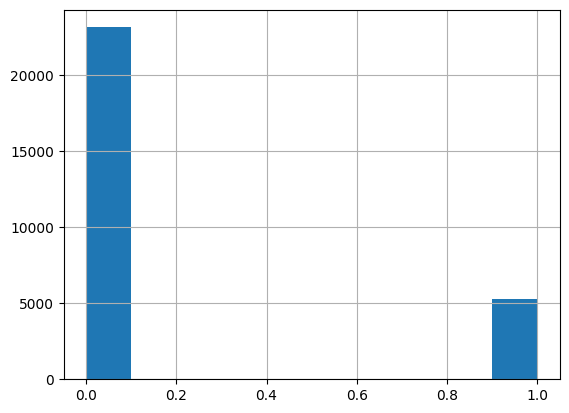

In [ ]:
# Mengecek keseimbangan data
df["churn"].hist()

<Axes: >

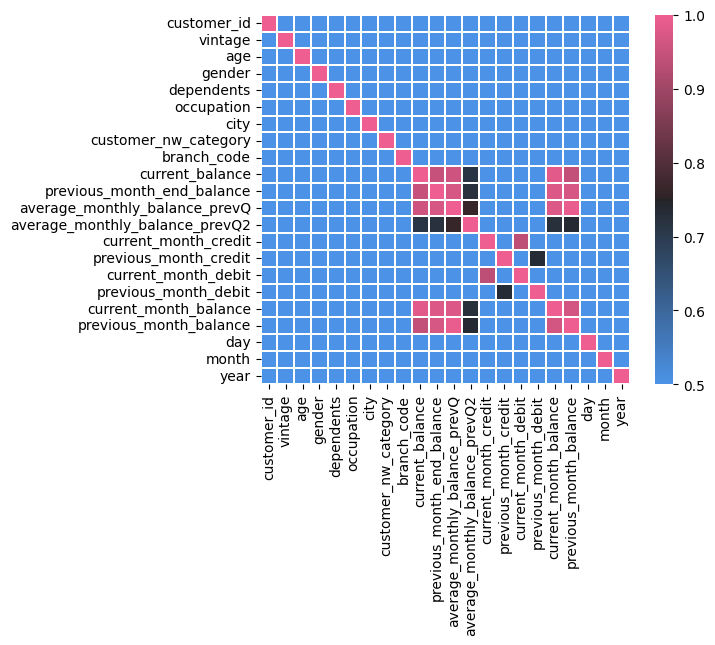

In [ ]:
# Melihat korelasi antar feature
corr = df.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
# Menghitung korelasi antara setiap fitur numerik dan target 'churn'
correlation_matrix = df.corr()
correlation_with_churn = correlation_matrix['churn'].sort_values(ascending=False)
print(correlation_with_churn)

churn                             1.000000
previous_month_debit              0.073058
current_month_debit               0.048041
previous_month_credit             0.042179
branch_code                       0.035469
month                             0.034240
dependents                        0.029335
occupation                        0.023928
current_month_credit              0.020755
gender                            0.020537
average_monthly_balance_prevQ2    0.018376
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
year                              0.004904
city                             -0.000882
customer_id                      -0.002723
vintage                          -0.004769
current_month_balance            -0.006391
age                              -0.020012
current_balance                  -0.024181
day                              -0.036558
Name: churn

In [ ]:
# Splitting the dataset into features and target variable
X = df.drop(['churn','customer_id','city','vintage', 'year', 'age','gender', 'current_month_credit','customer_nw_category', 'average_monthly_balance_prevQ'], axis=1)
y = df['churn']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dependents                      28382 non-null  float64
 1   occupation                      28382 non-null  int64  
 2   branch_code                     28382 non-null  int64  
 3   current_balance                 28382 non-null  float64
 4   previous_month_end_balance      28382 non-null  float64
 5   average_monthly_balance_prevQ2  28382 non-null  float64
 6   previous_month_credit           28382 non-null  float64
 7   current_month_debit             28382 non-null  float64
 8   previous_month_debit            28382 non-null  float64
 9   current_month_balance           28382 non-null  float64
 10  previous_month_balance          28382 non-null  float64
 11  day                             28382 non-null  int64  
 12  month                           

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Menghitung mutual information
mi_scores = mutual_info_classif(X, y)

# Menampilkan mutual information scores
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_scores)

current_balance                   0.081377
current_month_balance             0.040873
current_month_debit               0.031067
previous_month_debit              0.026720
previous_month_end_balance        0.026009
average_monthly_balance_prevQ2    0.014701
previous_month_balance            0.010446
previous_month_credit             0.004777
month                             0.002821
occupation                        0.002388
branch_code                       0.002316
day                               0.001478
dependents                        0.000000
dtype: float64


In [ ]:
from sklearn.feature_selection import f_classif

# Menggunakan ANOVA F-test
f_scores = f_classif(X, y)[0]

# Menampilkan F-scores
f_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
print(f_scores)

previous_month_debit              152.290646
current_month_debit                65.651717
previous_month_credit              50.578958
day                                37.980882
branch_code                        35.749268
month                              33.310761
dependents                         24.442667
current_balance                    16.604389
occupation                         16.257902
average_monthly_balance_prevQ2      9.586912
previous_month_balance              6.044984
previous_month_end_balance          1.345864
current_month_balance               1.159367
dtype: float64


# Pembuatan Model Naive Bayes

In [ ]:
class NaiveBayesFromScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            X_where_c = X[np.where(y == c)]
            self.parameters[c] = {
                "mean": X_where_c.mean(axis=0),
                "var": X_where_c.var(axis=0) + 1e-4,  # Tambahkan nilai kecil untuk menghindari pembagian dengan 0
                "prior": X_where_c.shape[0] / X.shape[0]
            }

    def predict(self, X):
        y_pred = [self._classify(sample) for sample in X]
        return np.array(y_pred)

    def _classify(self, sample):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.parameters[c]["prior"])
            posterior = np.sum(self._calculate_log_likelihood(self.parameters[c]["mean"], self.parameters[c]["var"], sample))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _calculate_log_likelihood(self, mean, var, sample):
        # Periksa ukuran array untuk men-debug
        if len(sample) != len(mean) or len(sample) != len(var):
            raise ValueError(f"Ukuran array tidak sesuai: sample {len(sample)}, mean {len(mean)}, var {len(var)}")

        # Menghindari logaritma dari 0 dengan pengecekan khusus
        likelihood = -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((sample - mean) ** 2) / var)
        return likelihood

    def predict_proba(self, X):
        # Mengembalikan probabilitas untuk setiap kelas
        return np.array([self._predict_proba(sample) for sample in X])

    def _predict_proba(self, sample):
        # Menghitung probabilitas posterior untuk setiap kelas
        posteriors = []
        for c in self.classes:
            prior = np.log(self.parameters[c]["prior"])
            posterior = np.sum(self._calculate_log_likelihood(self.parameters[c]["mean"], self.parameters[c]["var"], sample))
            posterior = prior + posterior
            posteriors.append(np.exp(posterior))  # Mengubah log probabilitas kembali ke skala normal

        # Menghitung probabilitas relatif untuk setiap kelas
        sum_posteriors = sum(posteriors)
        probabilities = [posterior / sum_posteriors for posterior in posteriors]
        return probabilities


# Inisialisasi model
nbm_from_scratch = NaiveBayesFromScratch()

# Train dan Test Split

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Cross Validation dan Learning Curve

Untuk menganalisis kondisi underfitting dan overfitting pada suatu model, grafik yang paling umum digunakan adalah grafik learning curve atau kurva pembelajaran. Grafik ini menunjukkan performa model baik pada training set maupun pada validation set terhadap berbagai ukuran dataset atau kompleksitas model. Berikut adalah beberapa aspek penting dari grafik learning curve:

Sumbu Horizontal: Biasanya menunjukkan ukuran training set atau kompleksitas model (misalnya, jumlah parameter atau kedalaman pada model pohon keputusan).

Sumbu Vertikal: Menunjukkan performa model, seringkali diukur menggunakan akurasi, skor mean squared error, atau metrik evaluasi lainnya.

Dua Linii Kurva:

Kurva Training: Menunjukkan bagaimana performa model terhadap data training berubah seiring dengan meningkatnya ukuran dataset atau kompleksitas model.
Kurva Validation: Menunjukkan performa model terhadap data validation.
Menganalisis Kurva:

Underfitting: Jika kedua kurva (training dan validation) berada pada tingkat performa yang rendah, ini menunjukkan underfitting. Artinya, model tidak mampu mempelajari data dengan baik, baik pada training set maupun validation set.
Overfitting: Jika kurva training menunjukkan performa yang tinggi tetapi kurva validation menunjukkan performa yang lebih rendah, ini menandakan overfitting. Ini berarti model terlalu mempelajari detail dan noise pada training set sehingga gagal untuk menggeneralisasi pada data baru.
Grafik learning curve memberikan wawasan yang berharga tentang bagaimana penyesuaian ukuran dataset atau kompleksitas model dapat memengaruhi performa model, dan membantu dalam menemukan keseimbangan yang tepat untuk mencegah underfitting atau overfitting.

In [ ]:
from sklearn.model_selection import KFold

# Konversi data ke NumPy arrays untuk kompatibilitas dengan model custom
X_np = X.values
y_np = y.values

# Inisialisasi K-Fold Cross-Validation
k_fold = KFold(n_splits=10, random_state=42, shuffle=True)

# Mempersiapkan list untuk menyimpan skor akurasi
accuracy_scores = []

# Melakukan Cross-Validation
for train_index, test_index in k_fold.split(X_np):
    # Membagi data menjadi data training dan testing
    X_train_fold, X_test_fold = X_np[train_index], X_np[test_index]
    y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]

    # Latih model dengan data training
    nbm_from_scratch.fit(X_train_fold, y_train_fold)

    # Membuat prediksi dan menghitung akurasi
    predictions = nbm_from_scratch.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, predictions)
    accuracy_scores.append(accuracy)

# Menampilkan skor untuk setiap fold
for i, score in enumerate(accuracy_scores, start=1):
    print(f"Akurasi pada Fold-{i}: {score:.4f}")

# Menampilkan rata-rata skor akurasi
mean_accuracy = np.mean(accuracy_scores)
print("Rata-rata Accuracy dari Cross-Validation: ", mean_accuracy);

Akurasi pada Fold-1: 0.8108
Akurasi pada Fold-2: 0.8151
Akurasi pada Fold-3: 0.8192
Akurasi pada Fold-4: 0.8143
Akurasi pada Fold-5: 0.8242
Akurasi pada Fold-6: 0.8185
Akurasi pada Fold-7: 0.7844
Akurasi pada Fold-8: 0.7953
Akurasi pada Fold-9: 0.8129
Akurasi pada Fold-10: 0.8073
Rata-rata Accuracy dari Cross-Validation:  0.8101964085757102


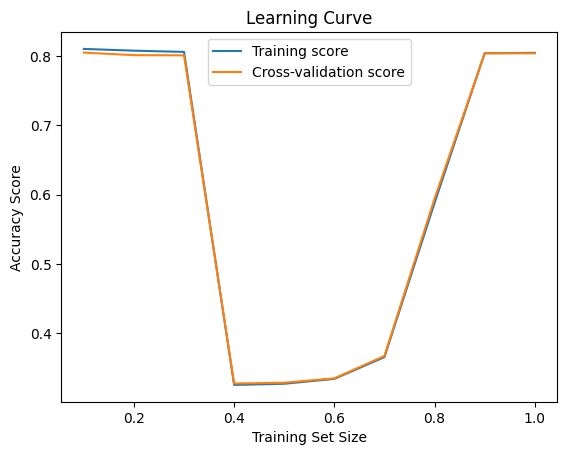

In [ ]:
from sklearn.metrics import accuracy_score

def plot_learning_curve(model, X, y, train_sizes, cv):
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        train_score_fold = []
        test_score_fold = []

        for train_index, test_index in cv.split(X):
            X_train_fold, X_test_fold = X[train_index], X[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]

            X_train_fold_sample = X_train_fold[:int(len(X_train_fold) * train_size)]
            y_train_fold_sample = y_train_fold[:int(len(y_train_fold) * train_size)]

            model.fit(X_train_fold_sample, y_train_fold_sample)
            y_train_pred = model.predict(X_train_fold_sample)
            y_test_pred = model.predict(X_test_fold)

            train_score_fold.append(accuracy_score(y_train_fold_sample, y_train_pred))
            test_score_fold.append(accuracy_score(y_test_fold, y_test_pred))

        train_scores.append(np.mean(train_score_fold))
        test_scores.append(np.mean(test_score_fold))

    plt.plot(train_sizes, train_scores, label='Training score')
    plt.plot(train_sizes, test_scores, label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.show()

# Konversi data ke NumPy arrays untuk kompatibilitas dengan model custom
X_np = X.values
y_np = y.values

# Inisialisasi K-Fold Cross-Validation
k_fold = KFold(n_splits=5, random_state=42, shuffle=True)

# Tentukan ukuran train set yang akan diuji
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot Learning Curve
plot_learning_curve(nbm_from_scratch, X_np, y_np, train_sizes, k_fold)

# Undersampling dan Oversampling Data

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Percobaan untuk undersampling
# Summarizing class distribution before undersampling
print("Before undersampling:", Counter(y_train))

# Defining the undersample strategy
undersample = RandomUnderSampler(random_state=42)

# Fitting and applying the transform to the training dataset
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Summarizing class distribution after undersampling
print("After undersampling:", Counter(y_train_under))


Before undersampling: Counter({0: 18483, 1: 4222})
After undersampling: Counter({0: 4222, 1: 4222})


In [ ]:
# Percobaan untuk oversampling
# Summarizing class distribution before oversampling
print("Before oversampling:", Counter(y_train))

# Defining the oversample strategy
oversample = RandomOverSampler(random_state=42)

# Fitting and applying the transform to the training dataset
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Summarizing class distribution after oversampling
print("After oversampling:", Counter(y_train_over))

Before oversampling: Counter({0: 18483, 1: 4222})
After oversampling: Counter({0: 18483, 1: 18483})


# Proses Fitting Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Latih model dengan data ori
nbm_from_scratch.fit(X_train.values, y_train.values)
nbm_pred_ori = nbm_from_scratch.predict(X_test.values)

# Latih model dengan data undersampled
nbm_from_scratch.fit(X_train_under.values, y_train_under.values)
nbm_pred_under = nbm_from_scratch.predict(X_test.values)

# Latih model dengan data oversampled
nbm_from_scratch.fit(X_train_over.values, y_train_over.values)
nbm_pred_over = nbm_from_scratch.predict(X_test.values)

print('Gaussian Naive Bayes Performance without Under/Oversampling:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, nbm_pred_ori))
print('F1 Score        : ', metrics.f1_score(y_test, nbm_pred_ori))
print('Precision       : ', metrics.precision_score(y_test, nbm_pred_ori))
print('Recall          : ', metrics.recall_score(y_test, nbm_pred_ori))
print('Confusion Matrix:\n ', confusion_matrix(y_test, nbm_pred_ori))

print('Gaussian Naive Bayes Performance with Oversampling:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, nbm_pred_over))
print('F1 Score        : ', metrics.f1_score(y_test, nbm_pred_over))
print('Precision       : ', metrics.precision_score(y_test, nbm_pred_over))
print('Recall          : ', metrics.recall_score(y_test, nbm_pred_over))
print('Confusion Matrix:\n ', confusion_matrix(y_test, nbm_pred_over))

print('Gaussian Naive Bayes Performance with Undersampling:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, nbm_pred_under))
print('F1 Score        : ', metrics.f1_score(y_test, nbm_pred_under))
print('Precision       : ', metrics.precision_score(y_test, nbm_pred_under))
print('Recall          : ', metrics.recall_score(y_test, nbm_pred_under))
print('Confusion Matrix:\n ', confusion_matrix(y_test, nbm_pred_under))

Gaussian Naive Bayes Performance without Under/Oversampling:
---------------------------------
Accuracy        :  0.7963713228818038
F1 Score        :  0.14623338257016247
Precision       :  0.31329113924050633
Recall          :  0.0953757225433526
Confusion Matrix:
  [[4422  217]
 [ 939   99]]
Gaussian Naive Bayes Performance with Oversampling:
---------------------------------
Accuracy        :  0.33891139686454114
F1 Score        :  0.31949229374433363
Precision       :  0.19678356041992406
Recall          :  0.848747591522158
Confusion Matrix:
  [[1043 3596]
 [ 157  881]]
Gaussian Naive Bayes Performance with Undersampling:
---------------------------------
Accuracy        :  0.8176853972168399
F1 Score        :  0.1309823677581864
Precision       :  0.5098039215686274
Recall          :  0.07514450867052024
Confusion Matrix:
  [[4564   75]
 [ 960   78]]


# ROC Curve and AUC score
ROC Curve (Receiver Operating Characteristic Curve) dan skor AUC (Area Under the Curve) adalah alat penting dalam evaluasi model klasifikasi, khususnya untuk kasus dengan kelas yang tidak seimbang atau ketika kita ingin menyeimbangkan antara sensitivity (true positive rate) dan specificity (false positive rate). Berikut adalah kegunaannya:

ROC Curve:

Grafik ini menggambarkan kinerja model klasifikasi pada berbagai ambang batas klasifikasi.
Sumbu x adalah False Positive Rate (1 - Specificity) dan sumbu y adalah True Positive Rate (Sensitivity).
Kurva yang lebih dekat ke sudut kiri atas menunjukkan performa yang lebih baik.
Skor AUC:

AUC adalah ukuran agregat dari performa model di semua ambang batas klasifikasi. Skor ini berkisar dari 0 sampai 1.
Skor yang lebih tinggi menunjukkan model dengan kinerja klasifikasi yang lebih baik secara keseluruhan.
Model dengan AUC mendekati 1 dianggap sangat baik, sedangkan AUC mendekati 0.5 menunjukkan tidak ada kemampuan klasifikasi yang lebih baik daripada tebakan acak.

Dengan menggunakan ROC Curve dan AUC, kita dapat menilai seberapa baik model membedakan antara kelas positif dan negatif di berbagai ambang batas, yang berguna untuk menentukan pengaturan terbaik untuk klasifikasi dalam konteks aplikasi tertentu.

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

<ipython-input-326-89ad9a4a72bc>:52: RuntimeWarning: invalid value encountered in double_scalars
  probabilities = [posterior / sum_posteriors for posterior in posteriors]


Peringatan: y_probs mengandung NaN. Menggantinya dengan 0.5 sebagai default


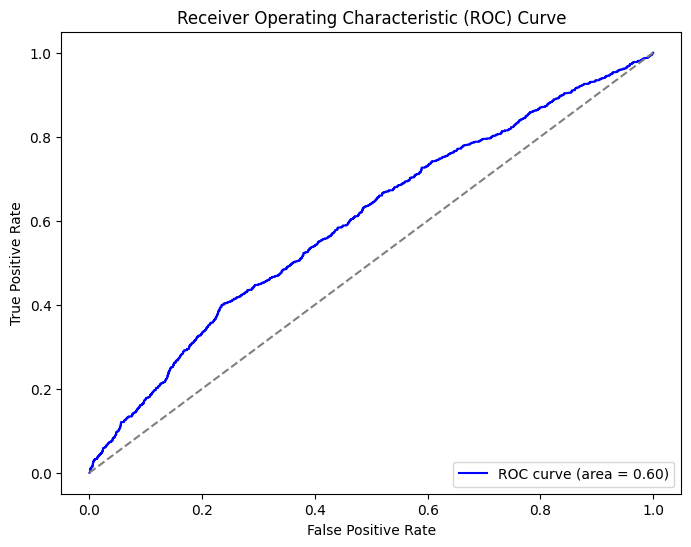

AUC Score: 0.60


In [ ]:
# Dapatkan probabilitas prediksi untuk kelas positif saja
y_probs = nbm_from_scratch.predict_proba(X_test.values)[:, 1]

if np.isnan(y_probs).any():
    print("Peringatan: y_probs mengandung NaN. Menggantinya dengan 0.5 sebagai default")
    y_probs = np.nan_to_num(y_probs, nan=0.5)

# Hitung nilai TPR (True Positive Rate) dan FPR (False Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Hitung nilai AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC Score: {roc_auc:.2f}')

In [ ]:
a = float(input("Sebutkan dependents: "))
b = input("Sebutkan occupation (self_employed/salaried/retired/student/company): ")
c = int(input("Sebutkan branch code: "))
d = float(input("Sebutkan current balance: "))
e = float(input("Masukkan previous month end balance: "))
f = float(input("Masukkan average monthly balance prevQ2: "))
g = float(input("Masukkan previous month credit: "))
h = float(input("Masukkan current month debit: "))
i = float(input("Masukkan previous month debit: "))
j = float(input("Masukkan current month balance: "))
k = float(input("Masukkan previous month balance: "))
l = int(input("Sebutkan hari terakhir transaksi (1-31): "))
m = int(input("Sebutkan bulan terakhir transaksi (1-12): "))


input_data = {
    'dependents' : a,
    'occupation' : b,
    'branch_code' : c,
    'current_balance' : d,
    'previous_month_end_balance': e,
    'average_monthly_balance_prevQ2': f,
    'previous_month_credit': g,
    'current_month_debit': h,
    'previous_month_debit': i,
    'current_month_balance': j,
    'previous_month_balance': k,
    'day': l,
    'month': m,
}

input_series = pd.Series(input_data)
input_df = pd.DataFrame([input_series])
input_df['occupation'] = labelend.fit_transform(input_df['occupation'])

nbm_from_scratch.fit(X_train.values, y_train.values)

# Prediksi Kelas dan Probabilitas
prediksi = nbm_from_scratch.predict(input_df.to_numpy())[0]
probabilities = nbm_from_scratch.predict_proba(input_df.to_numpy())[0]

print("Probabilitas Churn dan Tidak Churn:")
print(f"Churn: {probabilities[1]}, Tidak Churn: {probabilities[0]}")
153

if prediksi == [0]:
  print("")
  print("Customer tidak berhenti berlangganan")
else:
  print("")
  print("Customer berhenti berlangganan")

Sebutkan dependents: 2.0
Sebutkan occupation (self_employed/salaried/retired/student/company): self_employed
Sebutkan branch code: 388
Sebutkan current balance: 927.72
Masukkan previous month end balance: 1401.72
Masukkan average monthly balance prevQ2: 1871.12
Masukkan previous month credit: 714.61
Masukkan current month debit: 588.62
Masukkan previous month debit: 1538.06
Masukkan current month balance: 1157.15
Masukkan previous month balance: 1677.16
Sebutkan hari terakhir transaksi (1-31): 3
Sebutkan bulan terakhir transaksi (1-12): 11
Probabilitas Churn dan Tidak Churn:
Churn: 0.15960896698990043, Tidak Churn: 0.8403910330100995

Customer tidak berhenti berlangganan
